In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
filepath = "../data/enron/emails.csv"

# Read the enron data into a pandas.DataFrame called emails
emails = pd.read_csv(filepath)

print("Successfully loaded {} rows and {} columns!".format(emails.shape[0], emails.shape[1]))
print(emails.head())
print('ok')

Successfully loaded 517401 rows and 2 columns!
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
ok


In [2]:
# take a closer look at the first email
print(emails.loc[0]["message"])
print('ok')

Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>
Date: Mon, 14 May 2001 16:39:00 -0700 (PDT)
From: phillip.allen@enron.com
To: tim.belden@enron.com
Subject: 
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: Tim Belden <Tim Belden/Enron@EnronXGate>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Here is our forecast

 
ok


In [3]:
import email

def extract_messages(df):
    messages = []
    for item in df["message"]:
        # Return a message object structure from a string
        e = email.message_from_string(item)    
        # get message body  
        message_body = e.get_payload()
        messages.append(message_body)
    print("Successfully retrieved message body from e-mails!")
    return messages

bodies = extract_messages(emails)
print('ok')

Successfully retrieved message body from e-mails!
ok


In [4]:
# extract random 10000 enron email bodies for building dataset
import random
bodies_df = pd.DataFrame(random.sample(bodies, 10000))

# expand default pandas display options to make emails more clearly visible when printed
pd.set_option('display.max_colwidth', 300)

bodies_df.head() # you could do print(bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames
print('ok')

ok


In [5]:
#messages = emails["message"].apply(email.message_from_string)
#bodies_df = messages.apply(lambda x: x.get_payload()).sample(10000)
print('ok')

ok


In [6]:
filepath = "../data/fradulent_emails.txt"
with open(filepath, 'r',encoding="latin1") as file:
    data = file.read()
print('ok')

ok


In [7]:
print(data[:20000])
print('ok')

From r  Wed Oct 30 21:41:56 2002
Return-Path: <james_ngola2002@maktoob.com>
X-Sieve: cmu-sieve 2.0
Return-Path: <james_ngola2002@maktoob.com>
Message-Id: <200210310241.g9V2fNm6028281@cs.CU>
From: "MR. JAMES NGOLA." <james_ngola2002@maktoob.com>
Reply-To: james_ngola2002@maktoob.com
To: webmaster@aclweb.org
Date: Thu, 31 Oct 2002 02:38:20 +0000
Subject: URGENT BUSINESS ASSISTANCE AND PARTNERSHIP
X-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: 8bit
X-MIME-Autoconverted: from quoted-printable to 8bit by sideshowmel.si.UM id g9V2foW24311
Status: O

FROM:MR. JAMES NGOLA.
CONFIDENTIAL TEL: 233-27-587908.
E-MAIL: (james_ngola2002@maktoob.com).

URGENT BUSINESS ASSISTANCE AND PARTNERSHIP.


DEAR FRIEND,

I AM ( DR.) JAMES NGOLA, THE PERSONAL ASSISTANCE TO THE LATE CONGOLESE (PRESIDENT LAURENT KABILA) WHO WAS ASSASSINATED BY HIS BODY GUARD ON 16TH JAN. 2001.


THE INCIDENT OCCURRED IN OUR PRESENCE WH

In [8]:
fraud_emails = data.split("From r")

print("Successfully loaded {} spam emails!".format(len(fraud_emails)))


Successfully loaded 3978 spam emails!


In [9]:
fraud_bodies = extract_messages(pd.DataFrame(fraud_emails,columns=["message"],dtype=str))
fraud_bodies_df = pd.DataFrame(fraud_bodies[1:])

fraud_bodies_df.head() # you could do print(fraud_bodies_df.head()), but Jupyter displays this nicer for pandas DataFrames
print('ok')

Successfully retrieved message body from e-mails!
ok


In [10]:
Nsamp = 1000 # number of samples to generate in each class - 'spam', 'not spam'
maxtokens = 200 # the maximum number of tokens per document
maxtokenlen = 100 # the maximum length of each token
print('ok')

ok


In [11]:
def tokenize(row):
    if row is None or row is '':
        tokens = ""
    else:
        tokens = str(row).split(" ")[:maxtokens]
    return tokens
print('ok')

ok


In [12]:
import re

def reg_expressions(row):
    tokens = []
    try:
        for token in row:
            token = token.lower() # make all characters lower case
            token = re.sub(r'[\W\d]', "", token)
            token = token[:maxtokenlen] # truncate token
            tokens.append(token)
    except:
        token = ""
        tokens.append(token)
    return tokens
print('ok')

ok


In [13]:
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')    

def stop_word_removal(row):
    token = [token for token in row if token not in stopwords]
    token = filter(None, token)
    return token
print('ok')

ok


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lidayuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
def assemble_bag(data):
    used_tokens = []
    all_tokens = []

    for item in data:
        for token in item:
            if token in all_tokens:
                if token not in used_tokens:
                    used_tokens.append(token)
            else:
                all_tokens.append(token)
    
    df = pd.DataFrame(0, index = np.arange(len(data)), columns = used_tokens)
    
    for i, item in enumerate(data):
        for token in item:
            if token in used_tokens:
                df.iloc[i][token] += 1    
    return df
print('ok')

ok


In [15]:
# Convert everything to lower-case, truncate to maxtokens and truncate each token to maxtokenlen
EnronEmails = bodies_df.iloc[:,0].apply(tokenize)
EnronEmails = EnronEmails.apply(stop_word_removal)
EnronEmails = EnronEmails.apply(reg_expressions)
EnronEmails = EnronEmails.sample(Nsamp)

SpamEmails = fraud_bodies_df.iloc[:,0].apply(tokenize)
SpamEmails = SpamEmails.apply(stop_word_removal)
SpamEmails = SpamEmails.apply(reg_expressions)
SpamEmails = SpamEmails.sample(Nsamp)

raw_data = pd.concat([SpamEmails,EnronEmails], axis=0).values
print('ok')

ok


In [16]:
print("Shape of combined data is:")
print(raw_data.shape)
print("Data is:")
print(raw_data)

# create corresponding labels
Categories = ['spam','notspam']
header = ([1]*Nsamp)
header.extend(([0]*Nsamp))
print('ok')

Shape of combined data is:
(2000,)
Data is:
[list(['my', 'dear', 'friend', 'i', 'thomas', 'dickson', 'bank', 'manager', 'united', 'bank', 'for', 'africa', 'capetown', 'branch', 'i', 'urgent', 'confidential', 'business', 'proposition', 'you', 'on', 'june', '', '', 'gold', 'merchantcontractor', 'randgold', 'exploration', 'company', 'ms', 'lori', 'vanwaltersarvelo', 'made', 'a', 'numbered', 'time', 'fixed', 'deposite', 'twelve', 'calendar', 'months', 'valued', 'at', 'us', 'six', 'million', 'five', 'hundred', 'thousand', 'dollars', 'branch', 'upon', 'maturity', 'i', 'sent', 'routine', 'notification', 'forwarding', 'address', 'got', 'reply', 'after', 'month', 'sent', 'reminder', 'finally', 'discovered', 'contract', 'employers', 'randgold', 'exploration', 'company', 'ltd', 'ms', 'lori', 'vanwaltersarvelo', 'died', 'automobile', 'accident', 'on', 'investigation', 'i', 'found', 'leave', 'will', 'attempts', 'trace', 'next', 'kin', 'fruitless', 'i', 'therefore', 'made', 'investigation', 'discove

In [17]:
# create bag-of-words model
EnronSpamBag = assemble_bag(raw_data)
# this is the list of words in our bag-of-words model
predictors = [column for column in EnronSpamBag.columns]
EnronSpamBag # display the model for the user
print('ok')

ok


In [18]:
# shuffle raw data first
def unison_shuffle_data(data, header):
    p = np.random.permutation(len(header))
    data = data[p,:]
    header = np.asarray(header)[p]
    return data, header
data, header = unison_shuffle_data(EnronSpamBag.values, header)

# split into independent 70% training and 30% testing sets
idx = int(0.7*data.shape[0])

# 70% of data for training
train_x = data[:idx,:]
train_y = header[:idx]
# # remaining 30% for testing
test_x = data[idx:,:]
test_y = header[idx:] 

print("train_x/train_y list details, to make sure they are of the right form:")
print(len(train_x))
print(train_x)
print(train_y[:5])
print(len(train_y))
print('ok')

train_x/train_y list details, to make sure they are of the right form:
1400
[[ 4  0  1 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1 10 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  6  0 ...  0  0  0]]
[1 1 1 1 1]
1400
ok


In [19]:
from sklearn.linear_model import LogisticRegression

def fit(train_x,train_y):
    model = LogisticRegression()

    try:
        model.fit(train_x, train_y)
    except:
        pass
    return model

model = fit(train_x,train_y)
print('ok')

ok


In [20]:
predicted_labels = model.predict(test_x)

# print all labels for full trasparency
print("DEBUG::The logistic regression predicted labels are::")
print(predicted_labels)
print('ok')

DEBUG::The logistic regression predicted labels are::
[1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0

In [21]:
from sklearn.metrics import accuracy_score

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The logistic regression accuracy score is::")
print(acc_score)
print('ok')

DEBUG::The logistic regression accuracy score is::
0.99
ok


In [22]:
import time
from sklearn.svm import SVC # Support Vector Classification model
print('ok')

ok


In [23]:
# Create a support vector classifier
clf = SVC(C=1, gamma="auto", probability=True)

# Fit the classifier using the training data
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the SVC Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The SVC Classifier predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The SVC Classifier accuracy score is::")
print(acc_score)
print('ok')

Training the SVC Classifier took 122 seconds
DEBUG::The SVC Classifier predicted labels are::
[1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1
 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1
 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1
 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 0
 1 0 0

In [24]:
# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier

# Create a random forest Classifier. By convention, clf means 'Classifier'
clf = RandomForestClassifier(n_jobs=1, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (spam, not spam?)
start_time = time.time()
clf.fit(train_x, train_y)
end_time = time.time()
print("Training the Random Forest Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = clf.predict(test_x)
print("DEBUG::The RF predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The RF testing accuracy score is::")
print(acc_score)
print('ok')

Training the Random Forest Classifier took   2 seconds
DEBUG::The RF predicted labels are::
[1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1
 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 0 0 1

In [25]:
# Now, tune parameters systematically
from sklearn.model_selection import GridSearchCV

print("Available hyper-parameters for systematic tuning available with RF:")
print(clf.get_params())

# select a subset of parameters to tune, and specify grid for each
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 6, 10],
    'n_estimators': [10, 100, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(train_x, train_y)

print("Best parameters found:")
print(grid_search.best_params_)

print("Estimated accuracy is:")
acc_score = accuracy_score(test_y, grid_search.best_estimator_.predict(test_x))
print(acc_score)
print('ok')

Available hyper-parameters for systematic tuning available with RF:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': 1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters found:
{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Estimated accuracy is:
0.99
ok


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  1.7min finished


In [26]:
from sklearn.ensemble import GradientBoostingClassifier  # GBM algorithm
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import cross_val_score, GridSearchCV

def modelfit(alg, train_x, train_y, predictors, test_x, performCV=True, printFeatureImportance=False, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_x, train_y)
        
    #Predict training set:
    predictions = alg.predict(train_x)
    predprob = alg.predict_proba(train_x)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, train_x, train_y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(train_y,predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(train_y, predprob))
    
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp[:10].plot(kind='bar', title='Feature Importances')
        
    return alg.predict(test_x),alg.predict_proba(test_x)
        
gbm0 = GradientBoostingClassifier(random_state=10)

start_time = time.time()
test_predictions, test_probs = modelfit(gbm0, train_x, train_y, predictors, test_x)
end_time = time.time()

print("Training the Gradient Boosting Classifier took %3d seconds"%(end_time-start_time))

predicted_labels = test_predictions
print("DEBUG::The Gradient Boosting predicted labels are::")
print(predicted_labels)

acc_score = accuracy_score(test_y, predicted_labels)

print("DEBUG::The Gradient Boosting testing accuracy score is::")
print(acc_score)
print('ok')


Model Report
Accuracy : 0.9979
AUC Score (Train): 0.999306
CV Score : Mean - 0.9956819 | Std - 0.00387257 | Min - 0.9885407 | Max - 0.9995406
Training the Gradient Boosting Classifier took 222 seconds
DEBUG::The Gradient Boosting predicted labels are::
[1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1
 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1
 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1
 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 1 

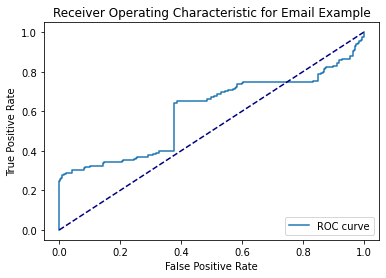

ok


In [27]:
# Make an ROC curve
test_probs_max = [] # first need to find probabilities corresponding
                    # to most likely class (max probability)
for i in range(test_probs.shape[0]):
    test_probs_max.append(test_probs[i,test_y[i]])
len(test_probs_max)

# now, generate the curve data
fpr, tpr, thresholds = metrics.roc_curve(test_y, np.array(test_probs_max))

# plot curve data
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots()
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Email Example')
plt.legend(loc="lower right")
plt.show()
print('ok')

In [28]:
fig.savefig('ROC.eps', format='eps',bbox_inches='tight')
fig.savefig('ROC.pdf', format='pdf',bbox_inches='tight')
fig.savefig('ROC.png', format='png',bbox_inches='tight')
fig.savefig('ROC.svg', format='svg',bbox_inches='tight')
print('ok')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ok


In [29]:
# Save .svg of ROC
from IPython.display import HTML
def create_download_link(title = "Download file", filename = "ROC.svg"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='ROC.svg')
print('ok')


ok
